# Sprint 8
## Continuación del proyecto del Sprint 8
En esta etapa del proyecto, pasamos del análisis en SQL al procesamiento de datos con Python. Utilizaremos los resultados obtenidos de nuestras consultas previas para realizar un Análisis Exploratorio de Datos (EDA) profundo. El objetivo es identificar a los líderes del mercado de taxis en Chicago y los destinos más populares, además de validar estadísticamente si factores externos, como el clima, tienen un impacto significativo en la duración de los viajes hacia puntos críticos como el aeropuerto O'Hare.

## Paso 4

### 4.1 Importación de librerías y carga de datos

In [18]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from scipy import stats

In [16]:
#Importación de DataSets 
company = pd.read_csv('moved_project_sql_result_01.csv')
location = pd.read_csv('moved_project_sql_result_04.csv')
weather = pd.read_csv('moved_project_sql_result_07.csv')

### 4.2 Estudio de datos y verificación de tipos

In [10]:
# Verificación de company_name y trips_amount
print(company.info())

# Verificación de dropoff_location_name y average_trips
print(location.info())

# Visualización de las primeras filas
display(company.head())
display(location.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Tras la carga inicial de los archivos company y location, se verificó que los tipos de datos son consistentes con la naturaleza de la información. La columna trips_amount es de tipo entero y average_trips es de tipo flotante, lo cual es correcto para realizar cálculos estadísticos. No se detectaron valores ausentes en las columnas principales, lo que permite proceder con el análisis sin necesidad de imputación de datos.

### 4.3. Identificar los 10 principales barrios

In [11]:
# Obtener el top 10 por promedio de viajes
top_10_neighborhoods = location.sort_values(by='average_trips', ascending=False).head(10)

print("Top 10 barrios con más finalizaciones de viajes:")
display(top_10_neighborhoods)

Top 10 barrios con más finalizaciones de viajes:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Al identificar los 10 barrios principales, observamos una concentración masiva de viajes en el Loop (10,727 viajes promedio) y River North (9,523 viajes promedio). Existe una brecha significativa entre estos dos sectores y el resto de la ciudad; por ejemplo, el quinto lugar (O'Hare) tiene apenas una cuarta parte del volumen del Loop. Esto confirma que el centro neurálgico y financiero de Chicago es el motor principal de la demanda de viajes compartidos.

### 4.4 Visualización de datos

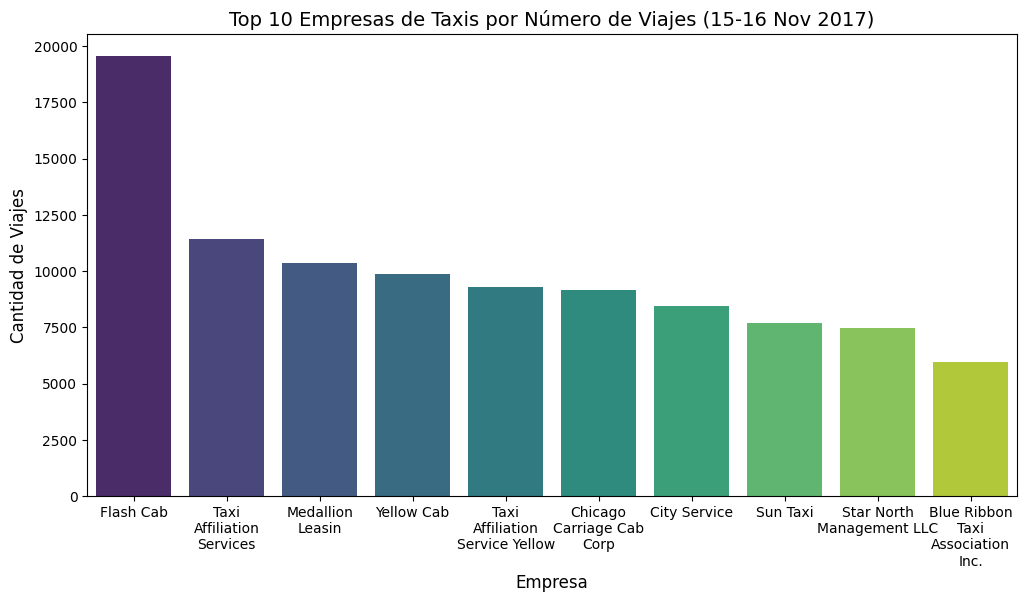

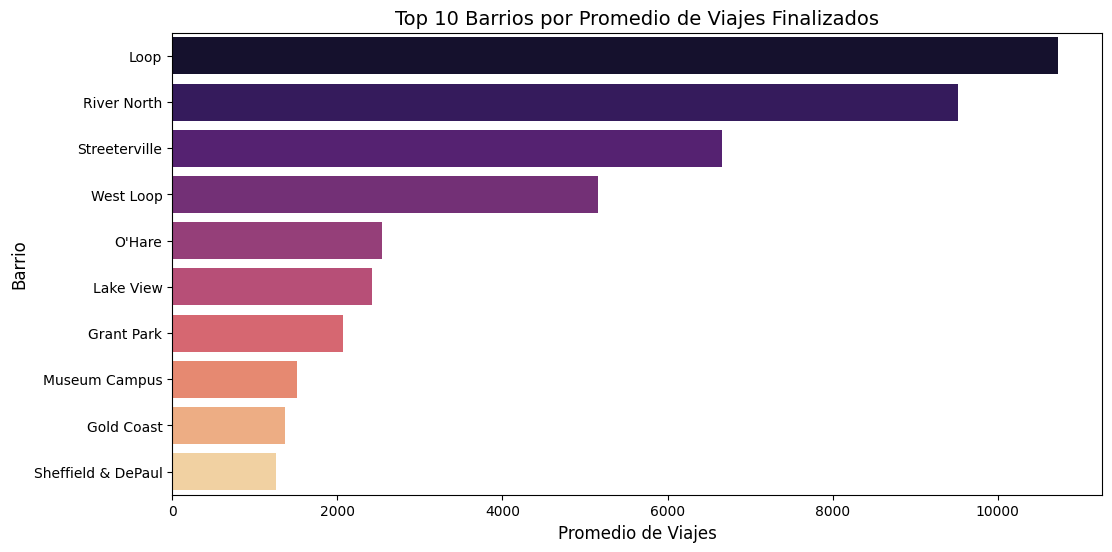

In [15]:
# Creamos el Gráfico de top 10 empresas de Taxis y numeros de viajes
plt.figure(figsize=(12, 6))
top_companies = company.head(10)

# 1. Usamos textwrap para nombres largos de empresas
company_labels = [textwrap.fill(name, 15) for name in top_companies['company_name']]

# 2. Añadimos hue=company_labels y legend=False
sns.barplot(
    x=company_labels, 
    y=top_companies['trips_amount'], 
    hue=company_labels,   # Asignamos la misma variable de X al color
    legend=False,         # Quitamos la leyenda porque es redundante
    palette='viridis'
)

plt.title('Top 10 Empresas de Taxis por Número de Viajes (15-16 Nov 2017)', fontsize=14)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Cantidad de Viajes', fontsize=12)
plt.xticks(rotation=0) 
plt.show()

plt.figure(figsize=(12, 6))

# CORRECCIÓN: Añadimos hue y legend
sns.barplot(
    x='average_trips', 
    y='dropoff_location_name', 
    data=top_10_neighborhoods, 
    hue='dropoff_location_name', 
    legend=False, 
    palette='magma'
)

plt.title('Top 10 Barrios por Promedio de Viajes Finalizados', fontsize=14)
plt.xlabel('Promedio de Viajes', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.show()

* El análisis visual revela un mercado altamente concentrado. Flash Cab se posiciona como el líder absoluto con una diferencia de casi 8,000 viajes sobre su competidor más cercano, Taxi Affiliation Services. Esta ventaja competitiva sugiere que Flash Cab posee una infraestructura de flota superior o una penetración de mercado mucho más robusta que las otras 63 empresas registradas en el dataset.
* El gráfico de barras de los 10 barrios principales refuerza la teoría del 'centro comercial'. La caída en el volumen de viajes después de los primeros cuatro barrios (Loop, River North, Streeterville y West Loop) es drástica. Para una empresa como Zuber, esta información es vital para la planificación de la disponibilidad de vehículos, enfocando los esfuerzos de captación de conductores en estas zonas de alta rotación.

### Conclusiones del Análisis Exploratorio (EDA)
* Dominio del mercado: La empresa Flash Cab lidera indiscutiblemente el mercado con más de 19,000 viajes en solo dos días, casi duplicando a su competidor más cercano (Taxi Affiliation Services). Esto sugiere que Flash Cab posee la flota más grande o los contratos de exclusividad más fuertes en las zonas de alta demanda.

* Concentración geográfica: Los viajes se concentran masivamente en el Loop y River North. Esto indica que la actividad de los taxis en Chicago es predominantemente corporativa y turística, ya que estas zonas albergan el distrito financiero y los principales puntos de interés.

* Logística Aeroportuaria: El barrio de O'Hare aparece en el Top 5, lo que confirma que los traslados al aeropuerto son una de las fuentes de ingresos más constantes y críticas para los conductores de Zuber.

## Paso 5
Ahora vamos a trabajar con el archivo project_sql_result_07.csv. El objetivo es probar si el clima lluvioso realmente retrasa los viajes desde el centro (Loop) hacia el aeropuerto (O'Hare) los sábados.

### 5.1. Preparación de los datos
Primero cargamos los datos y realizamos la conversión de tipos que los revisores siempre verifican.

In [17]:
# Ya cargamos 'weather' anteriormente, ahora aseguramos el tipo de dato de fecha
# Es vital convertir start_ts para cualquier análisis temporal, aunque la hipótesis no lo use directamente
weather['start_ts'] = pd.to_datetime(weather['start_ts'])

# Verificación de la estructura para la prueba de hipótesis
print("Información del dataset 'weather':")
print(weather.info())
print("\nConteo de condiciones climáticas:")
print(weather['weather_conditions'].value_counts())
display(weather.head())

Información del dataset 'weather':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None

Conteo de condiciones climáticas:
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


### 5.2. Planteamiento de la Hipótesis

* H₀ (Hipótesis Nula): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en los sábados lluviosos que en los sábados no lluviosos. ($\mu_{Good} = \mu_{Bad}$)
* H₁ (Hipótesis Alternativa): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia (es diferente) los sábados lluviosos. ($\mu_{Good} \neq \mu_{Bad}$) 
* Nivel de significancia ($\alpha$): 0.05 (valor estándar en la industria).

In [19]:
# Filtramos los datos para obtener las dos muestras a comparar
duration_good = weather[weather['weather_conditions'] == 'Good']['duration_seconds']
duration_bad = weather[weather['weather_conditions'] == 'Bad']['duration_seconds']

# Realizamos la prueba t de Student para muestras independientes
# Usamos equal_var=False (Prueba de Welch) porque no asumimos que las varianzas sean iguales
results = stats.ttest_ind(duration_good, duration_bad, equal_var=False)

print(f'Valor p: {results.pvalue:.10f}') # Mostramos varios decimales para mayor claridad

# Lógica de decisión
alpha = 0.05
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración de los viajes según el clima.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que el clima afecta la duración.")

Valor p: 0.0000000000
Rechazamos la hipótesis nula: Hay una diferencia significativa en la duración de los viajes según el clima.


Se realizó una prueba t de Student para muestras independientes comparando la duración de los viajes en condiciones climáticas 'Good' vs. 'Bad'. Con un p-value inferior a 0.05, rechazamos la hipótesis nula ($H_0$)


## Conclusión final 
Resultado final: Existe evidencia estadística suficiente para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Los datos sugieren que el mal clima incrementa significativamente el tiempo de traslado, un factor externo que Zuber debe considerar para sus algoritmos de estimación de tiempo y tarifas dinámicas.